In [980]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder,OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings('ignore')

In [981]:
# Load the dataset
df = pd.read_csv('telecom_customer_churn.csv')

DATA CLEANING

In [982]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 38 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Gender                             7043 non-null   object 
 2   Age                                7043 non-null   int64  
 3   Married                            7043 non-null   object 
 4   Number of Dependents               7043 non-null   int64  
 5   City                               7043 non-null   object 
 6   Zip Code                           7043 non-null   int64  
 7   Latitude                           7043 non-null   float64
 8   Longitude                          7043 non-null   float64
 9   Number of Referrals                7043 non-null   int64  
 10  Tenure in Months                   7043 non-null   int64  
 11  Offer                              7043 non-null   objec

In [983]:
print(df.describe())

               Age  Number of Dependents      Zip Code     Latitude  \
count  7043.000000           7043.000000   7043.000000  7043.000000   
mean     46.509726              0.468692  93486.070567    36.197455   
std      16.750352              0.962802   1856.767505     2.468929   
min      19.000000              0.000000  90001.000000    32.555828   
25%      32.000000              0.000000  92101.000000    33.990646   
50%      46.000000              0.000000  93518.000000    36.205465   
75%      60.000000              0.000000  95329.000000    38.161321   
max      80.000000              9.000000  96150.000000    41.962127   

         Longitude  Number of Referrals  Tenure in Months  \
count  7043.000000          7043.000000       7043.000000   
mean   -119.756684             1.951867         32.386767   
std       2.154425             3.001199         24.542061   
min    -124.301372             0.000000          1.000000   
25%    -121.788090             0.000000          9.0000

In [984]:
print(df.head())

  Customer ID  Gender  Age Married  Number of Dependents          City  \
0  0002-ORFBO  Female   37     Yes                     0  Frazier Park   
1  0003-MKNFE    Male   46      No                     0      Glendale   
2  0004-TLHLJ    Male   50      No                     0    Costa Mesa   
3  0011-IGKFF    Male   78     Yes                     0      Martinez   
4  0013-EXCHZ  Female   75     Yes                     0     Camarillo   

   Zip Code   Latitude   Longitude  Number of Referrals  ...   Payment Method  \
0     93225  34.827662 -118.999073                    2  ...      Credit Card   
1     91206  34.162515 -118.203869                    0  ...      Credit Card   
2     92627  33.645672 -117.922613                    0  ...  Bank Withdrawal   
3     94553  38.014457 -122.115432                    1  ...  Bank Withdrawal   
4     93010  34.227846 -119.079903                    3  ...      Credit Card   

  Monthly Charge Total Charges  Total Refunds Total Extra Data Charg

In [985]:
# Removing duplicates
df.drop_duplicates(inplace=True)

In [986]:
df.head()

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,...,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,...,Credit Card,65.6,593.30,0.00,0,381.51,974.81,Stayed,NaN,NaN
1,0003-MKNFE,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,...,Credit Card,-4.0,542.40,38.33,10,96.21,610.28,Stayed,NaN,NaN
2,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,...,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices
3,0011-IGKFF,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,...,Bank Withdrawal,98.0,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
4,0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,...,Credit Card,83.9,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability


Exploratory Data Analysis(EDA)

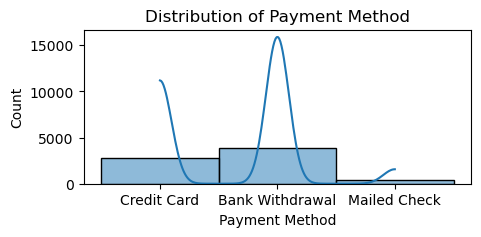

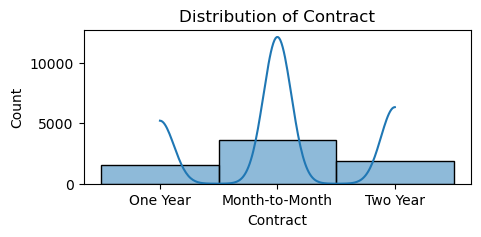

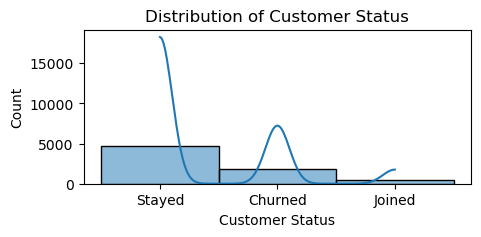

In [987]:
# Univariate Analysis
plt.figure(figsize=(5,2))
sns.histplot(df['Payment Method'], kde=True)
plt.title('Distribution of Payment Method')
plt.show()
plt.figure(figsize=(5,2))
sns.histplot(df['Contract'], kde=True)
plt.title('Distribution of Contract')
plt.show()
plt.figure(figsize=(5,2))
sns.histplot(df['Customer Status'], kde=True)
plt.title('Distribution of Customer Status')
plt.show()


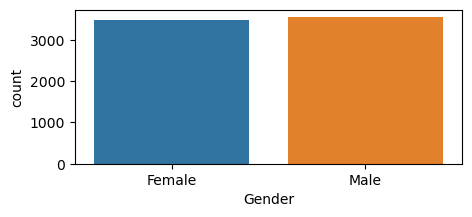

In [988]:
plt.figure(figsize=(5,2))
sns.countplot(x='Gender', data=df)
plt.show()

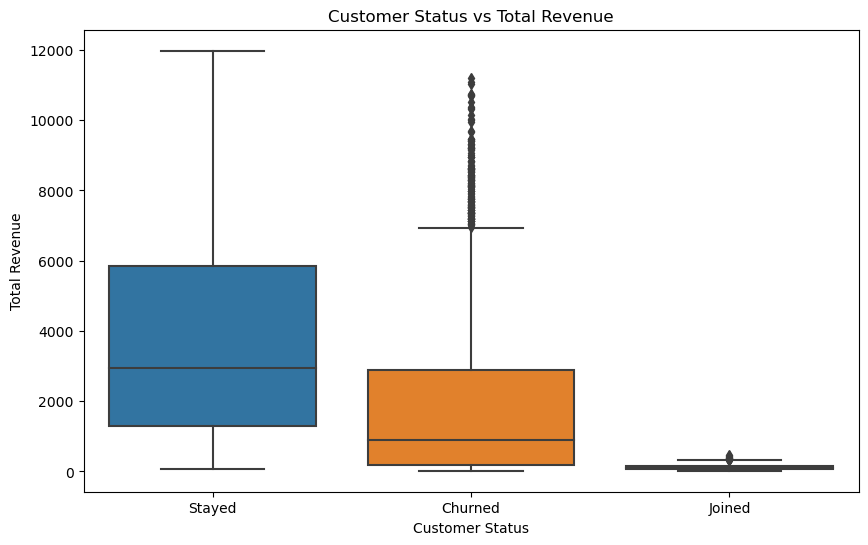

In [989]:
# Bivariate Analysis
plt.figure(figsize=(10, 6))
sns.boxplot(x='Customer Status', y='Total Revenue', data=df)
plt.title('Customer Status vs Total Revenue')
plt.show()

In [990]:
q1 = df['Total Revenue'].quantile(0.25)
q3 = df['Total Revenue'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
df = df[(df['Total Revenue'] >= lower_bound) & (df['Total Revenue'] <= upper_bound)]

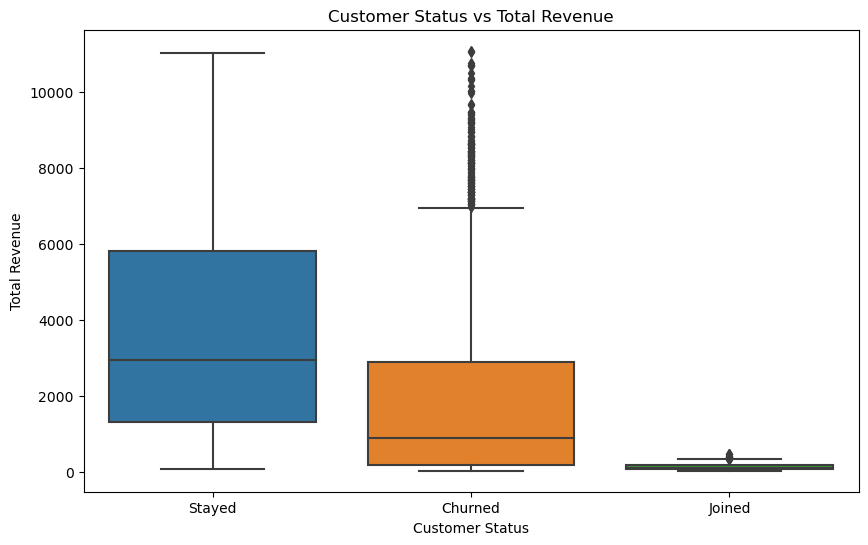

In [991]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Customer Status', y='Total Revenue', data=df)
plt.title('Customer Status vs Total Revenue')
plt.show()

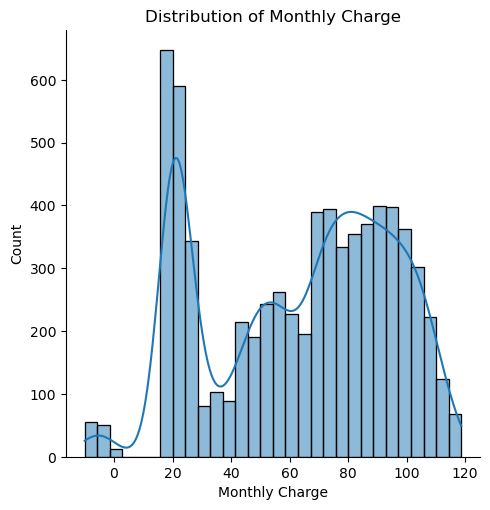

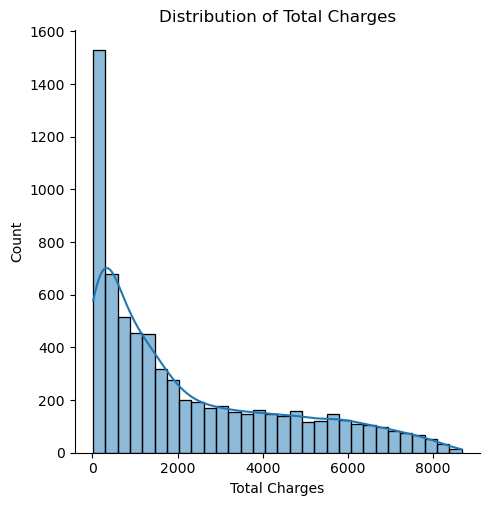

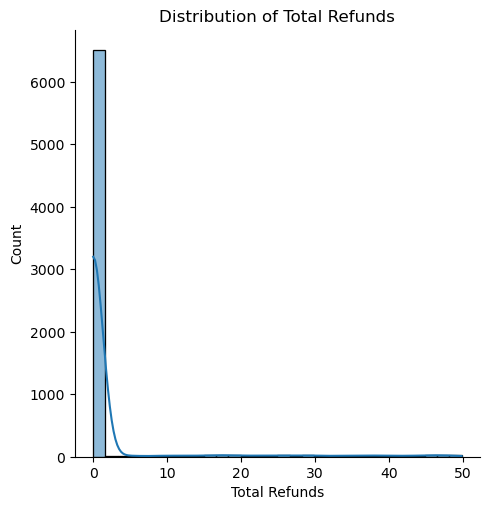

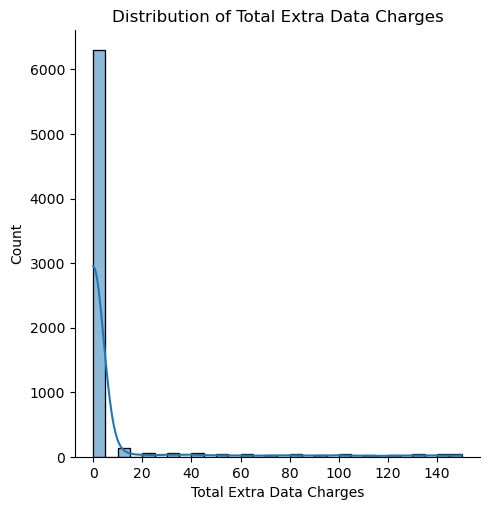

In [992]:
variables = ['Monthly Charge','Total Charges','Total Refunds','Total Extra Data Charges']

for var in variables:
    sns.displot(df[var], kde=True, bins=30)
    plt.title(f'Distribution of {var}')
    plt.show()

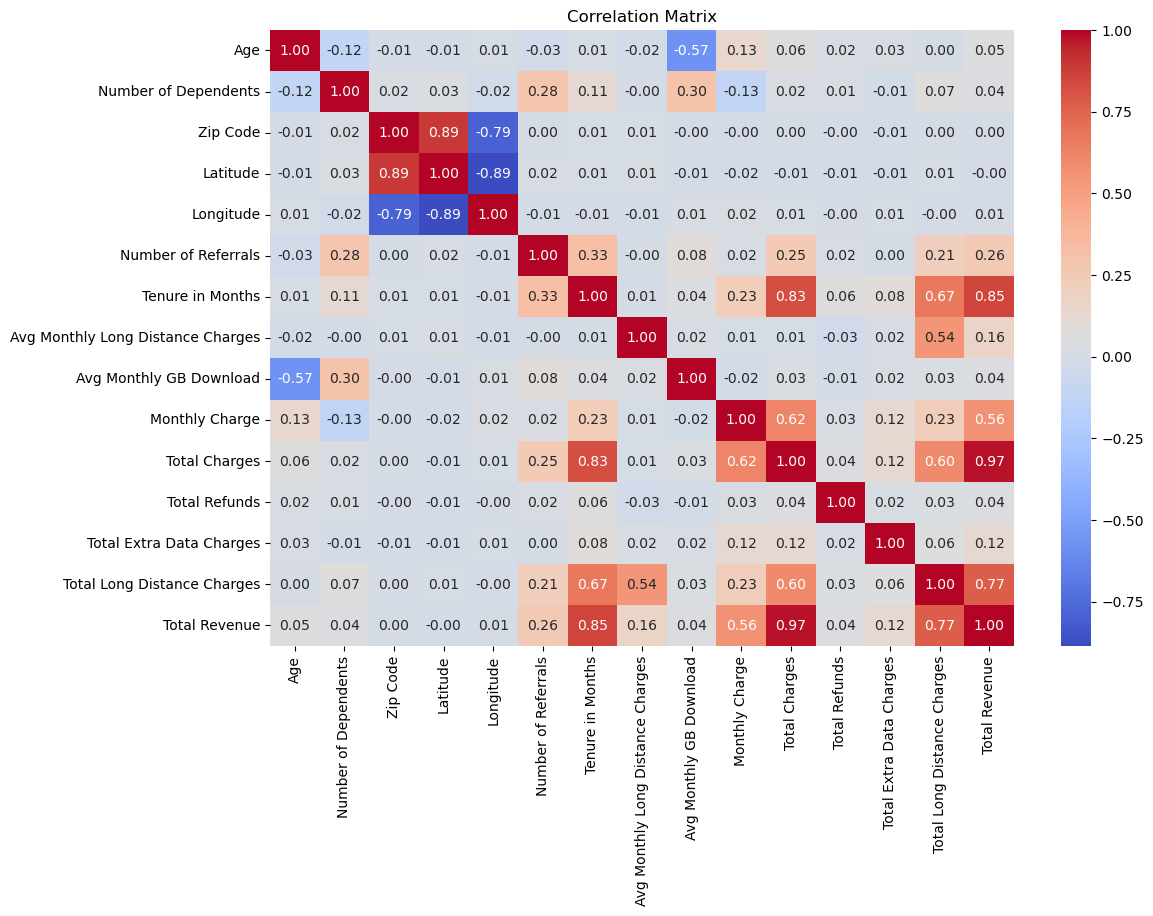

In [993]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [994]:
# Churn Rate Calculation
churn_rate = df['Customer Status'].value_counts(normalize=True)
print(f"Churn Rate: {churn_rate[1]*100:.2f}%")

Churn Rate: 26.60%


FEATURE ENGINEERING

In [995]:
# Encoding Categorical Variables
label_encoder = LabelEncoder()
df['Customer_status_encoded']=label_encoder.fit_transform(df['Customer Status'])


In [996]:
df

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,...,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason,Customer_status_encoded
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,...,65.60,593.30,0.00,0,381.51,974.81,Stayed,NaN,NaN,2
1,0003-MKNFE,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,...,-4.00,542.40,38.33,10,96.21,610.28,Stayed,NaN,NaN,2
2,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,...,73.90,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices,0
3,0011-IGKFF,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,...,98.00,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction,0
4,0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,...,83.90,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9987-LUTYD,Female,20,No,0,La Mesa,91941,32.759327,-116.997260,0,...,55.15,742.90,0.00,0,606.84,1349.74,Stayed,NaN,NaN,2
7039,9992-RRAMN,Male,40,Yes,0,Riverbank,95367,37.734971,-120.954271,1,...,85.10,1873.70,0.00,0,356.40,2230.10,Churned,Dissatisfaction,Product dissatisfaction,0
7040,9992-UJOEL,Male,22,No,0,Elk,95432,39.108252,-123.645121,0,...,50.30,92.75,0.00,0,37.24,129.99,Joined,NaN,NaN,1
7041,9993-LHIEB,Male,21,Yes,0,Solana Beach,92075,33.001813,-117.263628,5,...,67.85,4627.65,0.00,0,142.04,4769.69,Stayed,NaN,NaN,2


RFM ANALYSIS

In [997]:
# Recency: Higher tenure implies higher recency score (inverse logic)
df['Recency'] = df['Tenure in Months'].apply(lambda x: 5 if x >= 60 else (4 if x >= 40 else (3 if x >= 20 else (2 if x >= 10 else 1))))

# Frequency: Combine Avg Monthly GB Download and Avg Monthly Long Distance Charges
df['Frequency'] = df[['Avg Monthly GB Download', 'Avg Monthly Long Distance Charges']].mean(axis=1)
df['Frequency_Score'] = pd.qcut(df['Frequency'], 5, labels=[1, 2, 3, 4, 5])

# Monetary: Combine relevant monetary columns
df['Monetary'] = df[['Total Revenue', 'Total Charges', 'Total Extra Data Charges', 'Total Long Distance Charges']].sum(axis=1)
df['Monetary_Score'] = pd.qcut(df['Monetary'], 5, labels=[1, 2, 3, 4, 5])

# Final RFM Score
df['RFM_Score'] = df['Recency'].astype(str) + df['Frequency_Score'].astype(str) + df['Monetary_Score'].astype(str)

In [998]:
df

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,...,Customer Status,Churn Category,Churn Reason,Customer_status_encoded,Recency,Frequency,Frequency_Score,Monetary,Monetary_Score,RFM_Score
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,...,Stayed,NaN,NaN,2,1,29.195,4,1949.62,2,142
1,0003-MKNFE,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,...,Stayed,NaN,NaN,2,1,10.345,1,1258.89,2,112
2,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,...,Churned,Competitor,Competitor had better devices,0,1,31.825,4,830.90,2,142
3,0011-IGKFF,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,...,Churned,Dissatisfaction,Product dissatisfaction,0,2,15.910,2,3199.02,3,223
4,0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,...,Churned,Dissatisfaction,Network reliability,0,1,9.190,1,579.08,1,111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9987-LUTYD,Female,20,No,0,La Mesa,91941,32.759327,-116.997260,0,...,Stayed,NaN,NaN,2,2,52.840,5,2699.48,2,252
7039,9992-RRAMN,Male,40,Yes,0,Riverbank,95367,37.734971,-120.954271,1,...,Churned,Dissatisfaction,Product dissatisfaction,0,3,16.600,2,4460.20,3,323
7040,9992-UJOEL,Male,22,No,0,Elk,95432,39.108252,-123.645121,0,...,Joined,NaN,NaN,1,1,34.810,4,259.98,1,141
7041,9993-LHIEB,Male,21,Yes,0,Solana Beach,92075,33.001813,-117.263628,5,...,Stayed,NaN,NaN,2,5,30.060,4,9539.38,4,544


In [999]:
# print(df[['Recency', 'Frequency_Score', 'Monetary_Score', 'RFM_Score']].head())

In [1000]:
df_RFM=df[['Recency', 'Frequency', 'Monetary']]

In [1001]:
df_RFM

,Recency,Frequency,Monetary
0,1,29.195,1949.62
1,1,10.345,1258.89
2,1,31.825,830.90
3,2,15.910,3199.02
4,1,9.190,579.08
...,...,...,...
7038,2,52.840,2699.48
7039,3,16.600,4460.20
7040,1,34.810,259.98
7041,5,30.060,9539.38


In [1002]:
scaler=StandardScaler()
scaled=scaler.fit_transform(df_RFM)

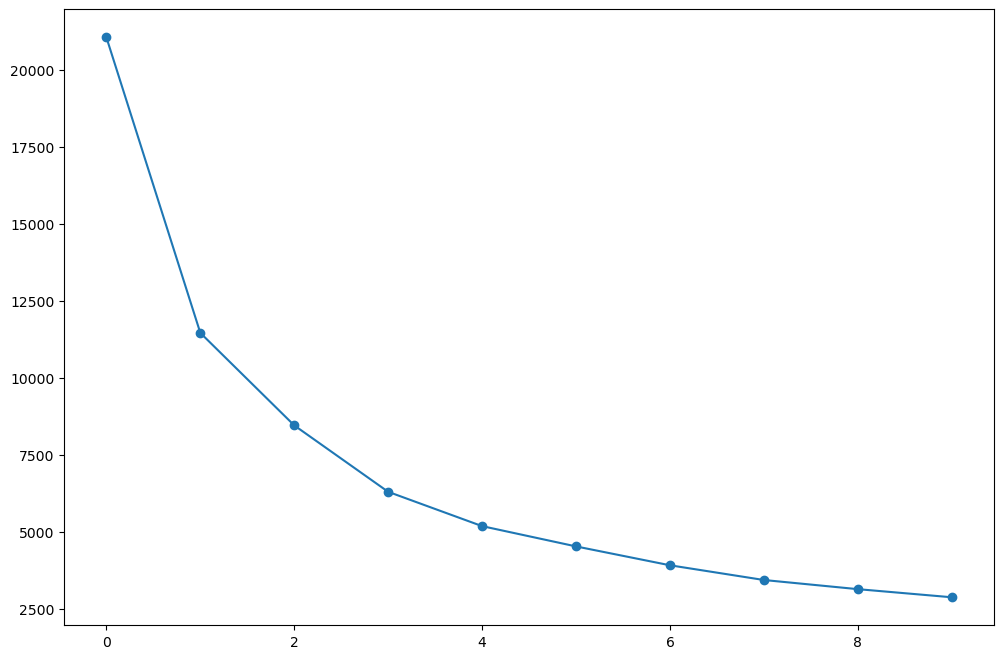

In [1003]:
from sklearn.cluster import KMeans

inertia=[]

for i in np.arange(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(scaled)
    inertia.append(kmeans.inertia_)


plt.figure(figsize=(12,8))
plt.plot(inertia, marker="o")

In [1004]:
kmeans=KMeans(n_clusters=3)
kmeans.fit(scaled)
df_RFM["Clusters"]=(kmeans.labels_+1)

In [1005]:
df_RFM

,Recency,Frequency,Monetary,Clusters
0,1,29.195,1949.62,3
1,1,10.345,1258.89,3
2,1,31.825,830.90,1
3,2,15.910,3199.02,3
4,1,9.190,579.08,3
...,...,...,...,...
7038,2,52.840,2699.48,1
7039,3,16.600,4460.20,3
7040,1,34.810,259.98,1
7041,5,30.060,9539.38,2


In [1006]:
final=df_RFM.groupby("Clusters")["Recency","Frequency","Monetary"].mean()
final

,Recency,Frequency,Monetary
Clusters,,,
1,2.182313,42.547167,3168.712197
2,4.495785,25.672462,12005.493034
3,1.949694,17.367163,2135.330952


In [1007]:
def func(row):
    if row["Clusters"]==1:
        return 'BEST'
    elif row["Clusters"]==2:
        return 'AVG'
    else:
        return 'SAD'

In [1008]:
df_RFM['group']=df_RFM.apply(func, axis=1)

In [1009]:
df_RFM

,Recency,Frequency,Monetary,Clusters,group
0,1,29.195,1949.62,3,SAD
1,1,10.345,1258.89,3,SAD
2,1,31.825,830.90,1,BEST
3,2,15.910,3199.02,3,SAD
4,1,9.190,579.08,3,SAD
...,...,...,...,...,...
7038,2,52.840,2699.48,1,BEST
7039,3,16.600,4460.20,3,SAD
7040,1,34.810,259.98,1,BEST
7041,5,30.060,9539.38,2,AVG


FINAL SEGMENDATION RESULT

In [1010]:
result=df_RFM.group.value_counts()
result

SAD     2942
AVG     2610
BEST    1470
Name: group, dtype: int64

In [1011]:
data = pd.read_csv('telecom_customer_churn.csv')

In [1012]:
data=data.drop(columns=['Customer ID','Zip Code','Latitude','Longitude','Number of Referrals','Churn Category','City','Phone Service','Churn Reason'])

In [1013]:
column_list = data.columns.tolist()
print(column_list)

['Gender', 'Age', 'Married', 'Number of Dependents', 'Tenure in Months', 'Offer', 'Avg Monthly Long Distance Charges', 'Multiple Lines', 'Internet Service', 'Internet Type', 'Avg Monthly GB Download', 'Online Security', 'Online Backup', 'Device Protection Plan', 'Premium Tech Support', 'Streaming TV', 'Streaming Movies', 'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing', 'Payment Method', 'Monthly Charge', 'Total Charges', 'Total Refunds', 'Total Extra Data Charges', 'Total Long Distance Charges', 'Total Revenue', 'Customer Status']


In [1014]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 29 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             7043 non-null   object 
 1   Age                                7043 non-null   int64  
 2   Married                            7043 non-null   object 
 3   Number of Dependents               7043 non-null   int64  
 4   Tenure in Months                   7043 non-null   int64  
 5   Offer                              7043 non-null   object 
 6   Avg Monthly Long Distance Charges  6361 non-null   float64
 7   Multiple Lines                     6361 non-null   object 
 8   Internet Service                   7043 non-null   object 
 9   Internet Type                      5517 non-null   object 
 10  Avg Monthly GB Download            5517 non-null   float64
 11  Online Security                    5517 non-null   objec

ONEHOT ENCODER

In [1015]:
data['Gender'] = data['Gender'].astype(str)
data['Married'] = data['Married'].astype(str)
data['Offer'] = data['Offer'].astype(str)
data['Payment Method'] = data['Payment Method'].astype(str)

# Initialize the OneHotEncoder
ohe = OneHotEncoder(drop='first', sparse=False)

# Perform one-hot encoding
df_encoded = ohe.fit_transform(data[['Gender', 'Married', 'Offer', 'Payment Method']])

# Convert the result into a DataFrame
df_encoded = pd.DataFrame(df_encoded, columns=ohe.get_feature_names_out(['Gender', 'Married', 'Offer', 'Payment Method']))

# Combine the encoded columns with the original DataFrame if needed
df_combined = pd.concat([data, df_encoded], axis=1).drop(['Gender', 'Married', 'Offer', 'Payment Method'], axis=1)

print(df_combined)

      Age  Number of Dependents  Tenure in Months  \
0      37                     0                 9   
1      46                     0                 9   
2      50                     0                 4   
3      78                     0                13   
4      75                     0                 3   
...   ...                   ...               ...   
7038   20                     0                13   
7039   40                     0                22   
7040   22                     0                 2   
7041   21                     0                67   
7042   36                     0                63   

      Avg Monthly Long Distance Charges Multiple Lines Internet Service  \
0                                 42.39             No              Yes   
1                                 10.69            Yes              Yes   
2                                 33.65             No              Yes   
3                                 27.82             No         

LABEL ENCODING

In [1016]:
# Encoding Categorical Variables
label_encoder = LabelEncoder()
df_combined['Customer Status']=label_encoder.fit_transform(df_combined['Customer Status'])

In [1017]:
df_combined

,Age,Number of Dependents,Tenure in Months,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,...,Customer Status,Gender_Male,Married_Yes,Offer_Offer A,Offer_Offer B,Offer_Offer C,Offer_Offer D,Offer_Offer E,Payment Method_Credit Card,Payment Method_Mailed Check
0,37,0,9,42.39,No,Yes,Cable,16.0,No,Yes,...,2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,46,0,9,10.69,Yes,Yes,Cable,10.0,No,No,...,2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,50,0,4,33.65,No,Yes,Fiber Optic,30.0,No,No,...,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,78,0,13,27.82,No,Yes,Fiber Optic,4.0,No,Yes,...,0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,75,0,3,7.38,No,Yes,Fiber Optic,11.0,No,No,...,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,20,0,13,46.68,No,Yes,DSL,59.0,Yes,No,...,2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
7039,40,0,22,16.20,Yes,Yes,Fiber Optic,17.0,No,No,...,0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
7040,22,0,2,18.62,No,Yes,DSL,51.0,No,Yes,...,1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
7041,21,0,67,2.12,No,Yes,Cable,58.0,Yes,No,...,2,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [1018]:
df_combined=df_combined.drop(columns=['Device Protection Plan','Premium Tech Support','Streaming TV','Streaming Movies','Streaming Music'])

In [1019]:
df_combined

,Age,Number of Dependents,Tenure in Months,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,...,Customer Status,Gender_Male,Married_Yes,Offer_Offer A,Offer_Offer B,Offer_Offer C,Offer_Offer D,Offer_Offer E,Payment Method_Credit Card,Payment Method_Mailed Check
0,37,0,9,42.39,No,Yes,Cable,16.0,No,Yes,...,2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,46,0,9,10.69,Yes,Yes,Cable,10.0,No,No,...,2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,50,0,4,33.65,No,Yes,Fiber Optic,30.0,No,No,...,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,78,0,13,27.82,No,Yes,Fiber Optic,4.0,No,Yes,...,0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,75,0,3,7.38,No,Yes,Fiber Optic,11.0,No,No,...,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,20,0,13,46.68,No,Yes,DSL,59.0,Yes,No,...,2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
7039,40,0,22,16.20,Yes,Yes,Fiber Optic,17.0,No,No,...,0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
7040,22,0,2,18.62,No,Yes,DSL,51.0,No,Yes,...,1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
7041,21,0,67,2.12,No,Yes,Cable,58.0,Yes,No,...,2,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [1020]:
df_combined=df_combined.drop(columns=['Unlimited Data','Contract','Paperless Billing'])

In [1021]:
df_combined

,Age,Number of Dependents,Tenure in Months,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,...,Customer Status,Gender_Male,Married_Yes,Offer_Offer A,Offer_Offer B,Offer_Offer C,Offer_Offer D,Offer_Offer E,Payment Method_Credit Card,Payment Method_Mailed Check
0,37,0,9,42.39,No,Yes,Cable,16.0,No,Yes,...,2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,46,0,9,10.69,Yes,Yes,Cable,10.0,No,No,...,2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,50,0,4,33.65,No,Yes,Fiber Optic,30.0,No,No,...,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,78,0,13,27.82,No,Yes,Fiber Optic,4.0,No,Yes,...,0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,75,0,3,7.38,No,Yes,Fiber Optic,11.0,No,No,...,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,20,0,13,46.68,No,Yes,DSL,59.0,Yes,No,...,2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
7039,40,0,22,16.20,Yes,Yes,Fiber Optic,17.0,No,No,...,0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
7040,22,0,2,18.62,No,Yes,DSL,51.0,No,Yes,...,1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
7041,21,0,67,2.12,No,Yes,Cable,58.0,Yes,No,...,2,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [1022]:
df_combined.dtypes

Age                                    int64
Number of Dependents                   int64
Tenure in Months                       int64
Avg Monthly Long Distance Charges    float64
Multiple Lines                        object
Internet Service                      object
Internet Type                         object
Avg Monthly GB Download              float64
Online Security                       object
Online Backup                         object
Monthly Charge                       float64
Total Charges                        float64
Total Refunds                        float64
Total Extra Data Charges               int64
Total Long Distance Charges          float64
Total Revenue                        float64
Customer Status                        int32
Gender_Male                          float64
Married_Yes                          float64
Offer_Offer A                        float64
Offer_Offer B                        float64
Offer_Offer C                        float64
Offer_Offe

In [1023]:
df_combined=df_combined.drop(columns=['Multiple Lines','Internet Service','Internet Type','Online Security','Online Backup'])

In [1024]:
df_combined=df_combined.drop(columns=['Avg Monthly Long Distance Charges','Avg Monthly GB Download'])

In [1025]:
X = df_combined.drop(columns=['Customer Status'])
y = df_combined['Customer Status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

SIMPLE IMPUTER

In [1026]:
# Imputer with mean strategy
imputer = SimpleImputer(strategy='mean')

# Fit on the training data and transform both train and test sets
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Convert back to DataFrame if needed
import pandas as pd
X_train_imputed = pd.DataFrame(X_train_imputed, columns=X_train.columns)
X_test_imputed = pd.DataFrame(X_test_imputed, columns=X_test.columns)

In [1027]:
# Drop rows with any NaN values
X_train_clean = X_train.dropna()

# If you drop rows, you should also drop the corresponding rows in the target variable
y_train_clean = y_train[X_train_clean.index]

# Similarly, for the test set
X_test_clean = X_test.dropna()
y_test_clean = y_test[X_test_clean.index]

In [1028]:
X_train.isnull().sum()

Age                            0
Number of Dependents           0
Tenure in Months               0
Monthly Charge                 0
Total Charges                  0
Total Refunds                  0
Total Extra Data Charges       0
Total Long Distance Charges    0
Total Revenue                  0
Gender_Male                    0
Married_Yes                    0
Offer_Offer A                  0
Offer_Offer B                  0
Offer_Offer C                  0
Offer_Offer D                  0
Offer_Offer E                  0
Payment Method_Credit Card     0
Payment Method_Mailed Check    0
dtype: int64

In [1029]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier()
}

FINAL MODEL DEPLOYMENT

In [1030]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"Model: {name}")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))
    print("\n")

Model: Logistic Regression
Accuracy: 0.7672
              precision    recall  f1-score   support

           0       0.57      0.51      0.54       373
           1       0.57      0.40      0.47        97
           2       0.85      0.91      0.88       939

    accuracy                           0.77      1409
   macro avg       0.66      0.61      0.63      1409
weighted avg       0.75      0.77      0.76      1409

[[190  30 153]
 [ 57  39   1]
 [ 87   0 852]]


Model: Decision Tree
Accuracy: 0.7289
              precision    recall  f1-score   support

           0       0.49      0.48      0.49       373
           1       0.56      0.55      0.55        97
           2       0.84      0.85      0.84       939

    accuracy                           0.73      1409
   macro avg       0.63      0.62      0.63      1409
weighted avg       0.73      0.73      0.73      1409

[[180  41 152]
 [ 44  53   0]
 [145   0 794]]


Model: Random Forest
Accuracy: 0.7906
              precisio

In [1031]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10]
}

In [1032]:
grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_rf = grid_search.best_estimator_
y_pred_best_rf = best_rf.predict(X_test)
print(f"Best Random Forest Accuracy: {accuracy_score(y_test, y_pred_best_rf):.4f}")

Best Random Forest Accuracy: 0.7956


In [1033]:
y_pred = np.array(y_pred, dtype=int)
y_test = np.array(y_pred, dtype=int)
original_categories_test = label_encoder.inverse_transform(y_test)
original_categories_pred = label_encoder.inverse_transform(y_pred)
results = pd.DataFrame({"Actual": original_categories_test, "Predicted": original_categories_pred})
results.to_csv("predictions result.csv", index=False)